In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn

In [2]:
train_folder = '/kaggle/input/tr-sign-language/tr_signLanguage_dataset/train'

In [3]:
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(train_folder))
    
    for folder in folders:
        index += 1
      
        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(train_folder + '/' + folder):
            img = cv2.imread(train_folder + '/' + folder + '/' + image, 0)
            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

    return x_train, x_test, y_train, y_test
    
def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [4]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  has started.
Loading images from folder  O  has started.
Loading images from folder  P  has started.
Loading images from folder  R  has started.
Loading images from folder  S  has started.
Loading images from folder  T  has started.
Loading images from folder  U  has started.
Loading images from folder  V  has started.
Loading images from folder  Y  has started.
Loading images from folder  Z  h

In [5]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=13)
x_test, y_test = shuffle(x_test, y_test, random_state=13)

In [6]:
#print ("x_train: ", x_train)
#print ("y_train: ", y_train)
#print ("x_test: ", x_test)
#print ("y_test: ", y_test)

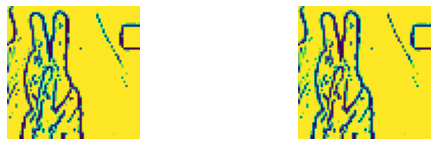

In [7]:
alpha = [chr(c) for c in range(65,91)]
un,count = np.unique(y_train,return_counts=True)
j=1
plt.figure(figsize=(20,20))
for i in un:
    plt.subplot(7,4,j)
    plt.imshow(x_train[np.where(y_train == np.array(i))[0][0]])
    plt.axis('off')
    j=j+1

In [8]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
                  10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'R', 17: 'S', 18: 'T', 
                  19: 'U', 20: 'V', 21: 'Y', 22: 'Z', 23: 'del', 24: 'nothing', 25: 'space'}

In [9]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

2022-06-18 14:34:08.378978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 14:34:08.502051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 14:34:08.502825: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-18 14:34:08.504029: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [11]:
classes = 26
epochs = 30
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test), shuffle=True, callbacks = [earlystopping])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-06-18 14:34:10.776023: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1760624640 exceeds 10% of free system memory.
2022-06-18 14:34:12.549627: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1760624640 exceeds 10% of free system memory.
2022-06-18 14:34:13.814603: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-06-18 14:34:15.088543: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3359/3359 [==============================] - 24s 5ms/step - loss: 2.5680 - accuracy: 0.2295 - val_loss: 2.2047 - val_accuracy: 0.3358
Epoch 2/30
3359/3359 [==============================] - 16s 5ms/step - loss: 1.9892 - accuracy: 0.3989 - val_loss: 1.8119 - val_accuracy: 0.4506
Epoch 3/30
3359/3359 [==============================] - 16s 5ms/step - loss: 1.6834 - accuracy: 0.4891 - val_loss: 1.6145 - val_accuracy: 0.5082
Epoch 4/30
3359/3359 [==============================] - 16s 5ms/step - loss: 1.4657 - accuracy: 0.5532 - val_loss: 1.4267 - val_accuracy: 0.5642
Epoch 5/30
3359/3359 [==============================] - 16s 5ms/step - loss: 1.2885 - accuracy: 0.6047 - val_loss: 1.3040 - val_accuracy: 0.5942
Epoch 6/30
3359/3359 [==============================] - 16s 5ms/step - loss: 1.1387 - accuracy: 0.6480 - val_loss: 1.1666 - val_accuracy: 0.6345
Epoch 7/30
3359/3359 [==============================] - 16s 5ms/step - loss: 1.0135 - accuracy: 0.6873 - val_loss: 1.0720 - val_accuracy: 0.6

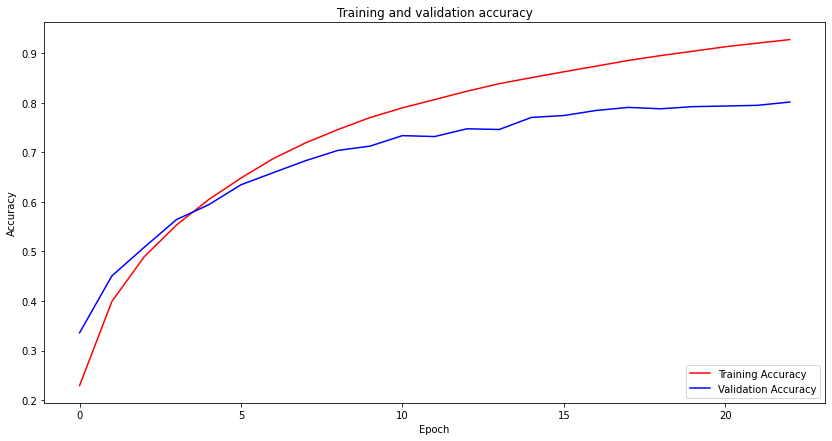

In [12]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

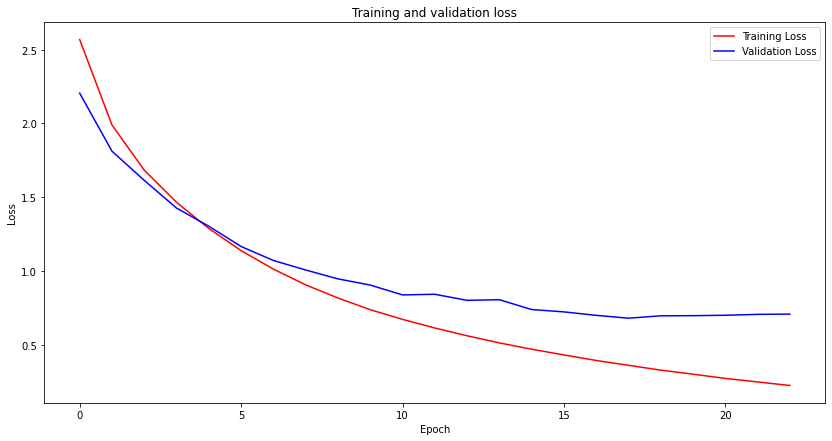

In [13]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [14]:
class_labels = list(map_characters.values())

In [15]:
score = model.evaluate(x_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)


Keras CNN - accuracy: 0.7905359864234924 

374/374 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           A       0.81      0.73      0.77       505
           B       0.85      0.89      0.87       504
           C       0.81      0.79      0.80       448
           D       0.82      0.74      0.78       473
           E       0.80      0.79      0.80       463
           F       0.73      0.80      0.76       482
           G       0.77      0.78      0.77       517
           H       0.74      0.83      0.78       437
           I       0.72      0.66      0.69       482
           J       0.72      0.68      0.70       483
           K       0.80      0.78      0.79       492
           L       0.65      0.71      0.68       453
           M       0.74      0.71      0.73       459
           N       0.69      0.80      0.74       495
           O       0.77      0.72      0.74       514
           P       0.84      0.85   

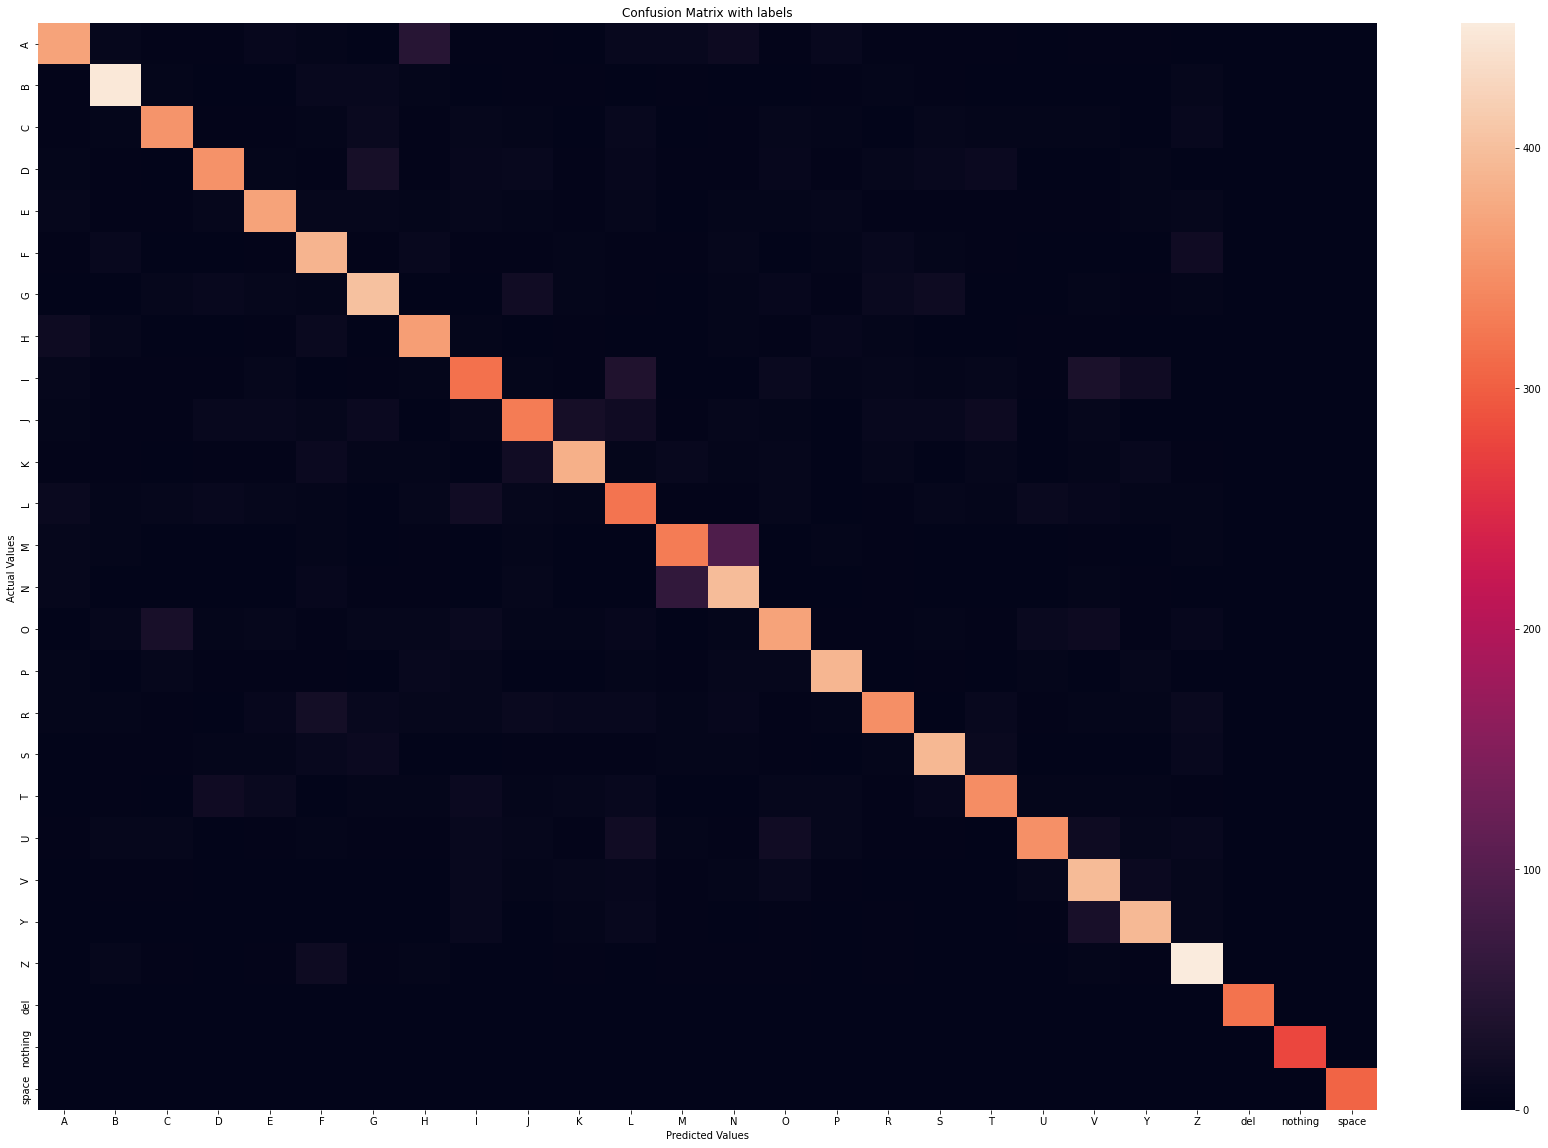

In [16]:
plt.figure(figsize=(30, 20))

ax = sns.heatmap(metrics.confusion_matrix(Y_true,Y_pred_classes))
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

plt.show()

In [17]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[369   7   2   3   8   5   0  46   3   2   1   9   9  15   3  10   3   2
    2   1   2   2   1   0   0   0]
 [  2 448   5   1   0   9   9   5   0   3   2   0   3   0   1   2   5   2
    0   0   0   0   7   0   0   0]
 [  2   4 353   3   3   4  11   2   6   5   1  10   1   2   6   5   0   6
    5   5   4   0   9   0   1   0]
 [  5   2   1 350   4   2  27   3   8  10   3   8   3   2   8   2   6  10
   13   1   0   4   1   0   0   0]
 [  6   3   3   6 368   6   6   4   7   5   3   7   0   4   4   6   3   2
    3   2   3   5   7   0   0   0]
 [  3  10   1   1   3 387   3   9   3   3   5   3   2   7   0   5   9   4
    2   1   1   1  19   0   0   0]
 [  1   1   7  10   7   5 401   0   0  21   4   3   0   5   8   3  12  17
    1   0   4   3   4   0   0   0]
 [ 17   6   1   0   3  12   1 362   5   1   2   0   1   5   2   8   4   0
    1   2   3   0   1   0   0   0]
 [  7   3   3   3   6   1   3   5 317   4   3  38   1   1  11   4   6   4
    6   3  33  19   0   0   0   1]
 

In [18]:
model.save('CNNThresholdTrSL.h5')

In [19]:
from keras.models import model_from_json
json_model = model.to_json()

with open('CNNThresholdTrSL.json', 'w') as json_file:
    json_file.write(json_model)

<AxesSubplot:>

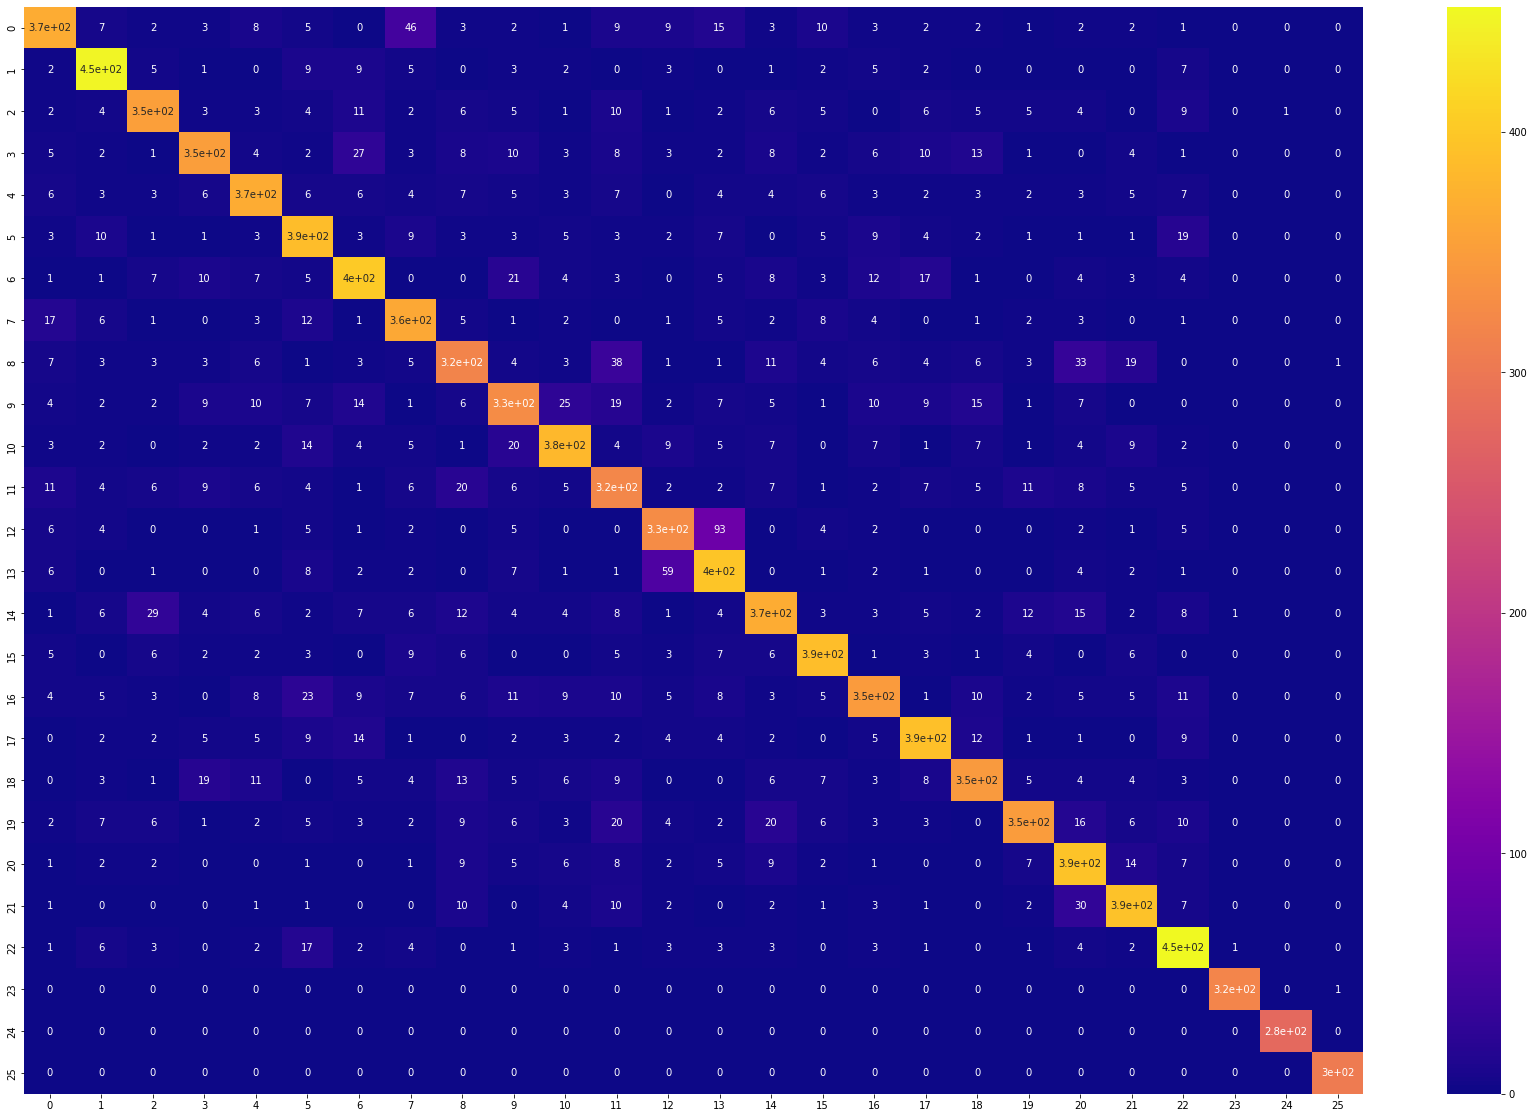

In [20]:
plt.figure(figsize=(30, 20))
sns.heatmap(confusion, cmap="plasma", annot=True)